<a href="https://colab.research.google.com/github/neetinds/Capstone3/blob/main/Capstone3_Data_science_Analytics_Pre_Processing___Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pre-Processing and Modeling
To identify the factors that lead to attrition with the goal of building a model that uses credentials of the candidate and various demographics factors to predict the probability of a candidate to look out for new jobs or remain at the company. Using modeling technique like clustering, classification, smote, xgboost-classifier etc.

##Elbow plot to check alternate number of levels to represent these feature :

In [ ]:
from sklearn.cluster import KMeans

dumcity=pd.get_dummies(categ['city'],drop_first=True)

inert_city=[]
for k in range(2,30):
    kcity=KMeans(k)
    kcity.fit(dumcity)
    
    inert_city.append(kcity.inertia_)

plt.title('Scree for City')
plt.plot(range(2,30),inert_city,color='red',marker='*')
plt.grid()
plt.show()

In [ ]:
dumexp=pd.get_dummies(categ['experience'],drop_first=True)

inert_exp=[]
for k in range(2,20):
    kexp=KMeans(k)
    kexp.fit(dumexp)
    
    inert_exp.append(kexp.inertia_)
    
plt.title('Scree for Experience')
plt.plot(range(2,20),inert_exp,color='red',marker='*')
plt.grid()
plt.show()

In [ ]:
dumcpsize=pd.get_dummies(categ['company_size'],drop_first=True)

inert_cpsz=[]
for k in range(2,8):
    kcpsz=KMeans(k)
    kcpsz.fit(dumcpsize)
    
    inert_cpsz.append(kcpsz.inertia_)

plt.title('Scree for Company Size')
plt.plot(range(2,8),inert_cpsz,color='red',marker='*')
plt.grid()
plt.show()

In [ ]:
*Collapsing* levels :

In [ ]:
# Collapsed city from 123 to 15 levels
kmeancity=KMeans(n_clusters=15)
kmeancity.fit(dumcity)

city=kmeancity.labels_
city

In [ ]:
# Collapsed experience from 22 to 10 levels
kmeanexp=KMeans(n_clusters=10)
kmeanexp.fit(dumexp)

exp=kmeanexp.labels_
exp

In [ ]:
# Collapsed company size from 9 to 5 levels
kmeancpsize=KMeans(n_clusters=5)
kmeancpsize.fit(dumcpsize)

cpsize=kmeancpsize.labels_
cpsize

In [ ]:
categ['city']=city
categ['experience']=exp
categ['company_size']=cpsize

categ.head()

In [ ]:
categ[colps].head()

In [ ]:
# Visualizing the label distributions among cateforic features after collapse (ALL categoric features included)
for i in categ:
    plt.figure(figsize=(10,3))
    sns.countplot(categ[i])
    plt.show()

In [ ]:
# Final updation on the train set with collapsed features thier compressed levels
train[colps]=categ[colps]
train.head()

In [ ]:
# One-hot encoding of all categoric features of train set
train=pd.get_dummies(data=train,columns=list(categ.columns),drop_first=True)
train.head()

In [ ]:
train.shape

In [ ]:
sns.heatmap(train.isnull())
plt.show()

##Oversampling

In [ ]:
Y=train['target']
X=train.drop(['target','enrollee_id'],axis=1) # Id varibale is not going to considered

In [ ]:
# Check for Data imbalance
train['target'].value_counts()

SMOTE : Is an oversampling technique where the synthetic samples are generated for the minority class

In [ ]:
# Balancing data using SMOTE
from imblearn.over_sampling import SMOTE
from pandas import Series
smt=SMOTE(k_neighbors=9,random_state=10)

X,Y=smt.fit_resample(X,Y)

In [ ]:
print(X)
print(Y)

# Modeling

Training and Test Datasets
When fitting models, we would like to ensure two things:
* We have found the best model (in terms of model parameters).
* The model is highly likely to generalize i.e. perform well on unseen data.

Purpose of splitting data into Training/testing sets
* We built our model with the requirement that the model fit the data well.
* As a side-effect, the model will fit THIS dataset well. What about new data?
    * We wanted the model for predictions, right?
* One simple solution, leave out some data (for testing) and train the model on the rest
* This also leads directly to the idea of cross-validation, next section.

# Train Set

In [ ]:
from sklearn.model_selection import train_test_split
Xtr,Xte,Ytr,Yte=train_test_split(X,Y,test_size=0.02,random_state=10)

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=10)
log.fit(Xtr,Ytr)

#Check for Variance:
print('Train accuracy :',log.score(Xtr,Ytr))
print('Test accuracy :',log.score(Xte,Yte))

Train accuracy : 0.772802342166504
Test accuracy : 0.7886029411764706


In [ ]:
# Check for Bais
from sklearn.model_selection import KFold,cross_val_score
cvs=cross_val_score(log,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True))
cvsrec=cross_val_score(log,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True),scoring='recall')
cvsprec=cross_val_score(log,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True),scoring='precision')
cvsf1=cross_val_score(log,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True),scoring='f1')

print('Accuracy :',cvs)
print('Recall :',cvsrec)
print('Precision :',cvsprec)
print('F1 :',cvsf1)

Accuracy : [0.77175994 0.77592613 0.76677928]
Recall : [0.76098901 0.75304191 0.76254998]
Precision : [0.76737298 0.78032939 0.7848013 ]
F1 : [0.77585622 0.76866613 0.76004119]


In [ ]:
# Predictions
from sklearn.model_selection import cross_val_predict
ylog=cross_val_predict(log,Xte,Yte,cv=KFold(n_splits=3,shuffle=True))
ylogprob=cross_val_predict(log,Xte,Yte,cv=KFold(n_splits=3,shuffle=True),method='predict_proba')

###Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(Xtr,Ytr)

#Check for Variance:
print('Train accuracy :',nb.score(Xtr,Ytr))
print('Test accuracy :',nb.score(Xte,Yte))

Train accuracy : 0.6496509271075745
Test accuracy : 0.6966911764705882


In [ ]:
# Check for Bais
cvs=cross_val_score(nb,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True))
cvsrec=cross_val_score(nb,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True),scoring='recall')
cvsprec=cross_val_score(nb,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True),scoring='precision')
cvsf1=cross_val_score(nb,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True),scoring='f1')

print('Accuracy :',cvs)
print('Recall :',cvsrec)
print('Precision :',cvsprec)
print('F1 :',cvsf1)

Accuracy : [0.64621101 0.65217881 0.64853604]
Recall : [0.82450181 0.83868778 0.84883721]
Precision : [0.61071195 0.59771429 0.61333771]
F1 : [0.69781576 0.70582644 0.71077184]


In [ ]:
# Predictions
ynb=cross_val_predict(nb,Xte,Yte,cv=KFold(n_splits=3,shuffle=True))
ynbprob=cross_val_predict(nb,Xte,Yte,cv=KFold(n_splits=3,shuffle=True),method='predict_proba')

###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_leaf_nodes=32,random_state=10)
dt.fit(Xtr,Ytr)

#Check for Variance:
print('Train accuracy :',dt.score(Xtr,Ytr))
print('Test accuracy :',dt.score(Xte,Yte))

Train accuracy : 0.8089858118759853
Test accuracy : 0.8272058823529411


In [ ]:
# Check for Bais
cvs=cross_val_score(dt,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True))
cvsrec=cross_val_score(dt,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True),scoring='recall')
cvsprec=cross_val_score(dt,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True),scoring='precision')
cvsf1=cross_val_score(dt,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True),scoring='f1')

print('Accuracy :',cvs)
print('Recall :',cvsrec)
print('Precision :',cvsprec)
print('F1 :',cvsf1)

Accuracy : [0.80047292 0.80970611 0.80810811]
Recall : [0.81163372 0.80859637 0.80518018]
Precision : [0.81906525 0.81373215 0.81685842]
F1 : [0.80951318 0.801951   0.8102517 ]


In [ ]:
# Predictions
ydt=cross_val_predict(dt,Xte,Yte,cv=KFold(n_splits=3,shuffle=True))
ydtprob=cross_val_predict(dt,Xte,Yte,cv=KFold(n_splits=3,shuffle=True),method='predict_proba')

###SVC

In [ ]:
from sklearn.svm import SVC
svm=SVC(probability=True)
svm.fit(Xtr,Ytr)

#Check for Variance:
print('Train accuracy :',svm.score(Xtr,Ytr))
print('Test accuracy :',svm.score(Xte,Yte))

Train accuracy : 0.8264019217776443
Test accuracy : 0.8235294117647058


In [ ]:
# Check for Bais
cvs=cross_val_score(svm,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True))
cvsrec=cross_val_score(svm,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True),scoring='recall')
cvsprec=cross_val_score(svm,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True),scoring='precision')
cvsf1=cross_val_score(svm,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True),scoring='f1')

print('Accuracy :',cvs)
print('Recall :',cvsrec)
print('Precision :',cvsprec)
print('F1 :',cvsf1)

Accuracy : [0.80981871 0.81049431 0.80236486]
Recall : [0.8082254  0.80553058 0.80399193]
Precision : [0.814798   0.80423996 0.80528575]
F1 : [0.81308199 0.80185583 0.80583614]


In [ ]:
# Predictions
ysvm=cross_val_predict(svm,Xte,Yte,cv=2)
ysvmprob=cross_val_predict(svm,Xte,Yte,cv=KFold(n_splits=3,shuffle=True),method='predict_proba')

###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(Xtr,Ytr)

#Check for Variance:
print('Train accuracy :',knn.score(Xtr,Ytr))
print('Test accuracy :',knn.score(Xte,Yte))

Train accuracy : 0.8427670595300654
Test accuracy : 0.7977941176470589


In [ ]:
# Check for Bais
cvs=cross_val_score(knn,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True))
cvsrec=cross_val_score(knn,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True),scoring='recall')
cvsprec=cross_val_score(knn,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True),scoring='precision')
cvsf1=cross_val_score(knn,Xtr,Ytr,cv=KFold(n_splits=3,shuffle=True),scoring='f1')

print('Accuracy :',cvs)
print('Recall :',cvsrec)
print('Precision :',cvsprec)
print('F1 :',cvsf1)

Accuracy : [0.77750253 0.77716473 0.77781532]
Recall : [0.88182857 0.87474883 0.88616974]
Precision : [0.729548   0.73275384 0.7320038 ]
F1 : [0.79698783 0.79748377 0.80061412]


In [ ]:
# Predictions
yknn=cross_val_predict(knn,Xte,Yte,cv=3)
yknnprob=cross_val_predict(knn,Xte,Yte,cv=KFold(n_splits=3,shuffle=True),method='predict_proba')

ROC-AUC scores and ROC curves to select Base Model: 
The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

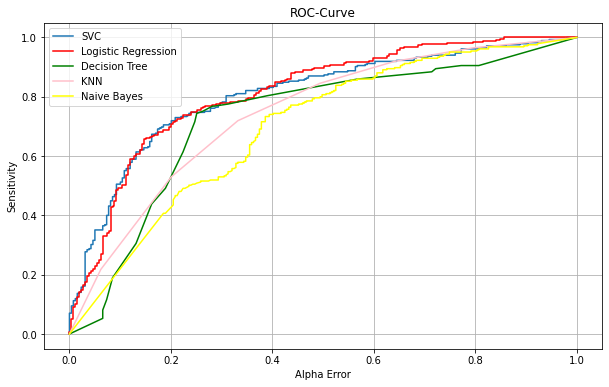

ROCAUC Logistic Regression : 0.8139538034274876
ROCAUC SVC : 0.8069023911129175
ROCAUC KNN : 0.743487096118675
ROCAUC Decision Tree : 0.7283343493869809
ROCAUC Naive Bayes : 0.6973040709882816


In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

plt.figure(figsize=(10,6))

# SVC:
asvm,recsvm,thsvm=roc_curve(Yte,ysvmprob[:,1])
plt.plot(asvm,recsvm,label='SVC')

# Logistic Regression:
alog,reclog,thlog=roc_curve(Yte,ylogprob[:,1])
plt.plot(alog,reclog,color='red',label='Logistic Regression')

# Decision Tree:
adt,recdt,thdt=roc_curve(Yte,ydtprob[:,1])
plt.plot(adt,recdt,color='green',label='Decision Tree')

# KNN:
aknn,recknn,thknn=roc_curve(Yte,yknnprob[:,1])
plt.plot(aknn,recknn,color='pink',label='KNN')

# Naive Bayes:
anb,recknb,thnb=roc_curve(Yte,ynbprob[:,1])
plt.plot(anb,recknb,color='yellow',label='Naive Bayes')


plt.legend()
plt.grid()
plt.title('ROC-Curve')
plt.xlabel('Alpha Error')
plt.ylabel('Sensitivity')
plt.show()

print('ROCAUC Logistic Regression :',roc_auc_score(Yte,ylogprob[:,1]))
print('ROCAUC SVC :',roc_auc_score(Yte,ysvmprob[:,1]))
print('ROCAUC KNN :',roc_auc_score(Yte,yknnprob[:,1]))
print('ROCAUC Decision Tree :',roc_auc_score(Yte,ydtprob[:,1]))
print('ROCAUC Naive Bayes :',roc_auc_score(Yte,ynbprob[:,1]))